In [1]:
## Preamble / required packages
import numpy as np
np.random.seed(0)

## Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline

import warnings
## Comment this out to activate warnings
warnings.filterwarnings('ignore')


plt.style.use("dark_background")

# Is there anything linear models can't do?

Text(0, 0.5, 'Feature 2')

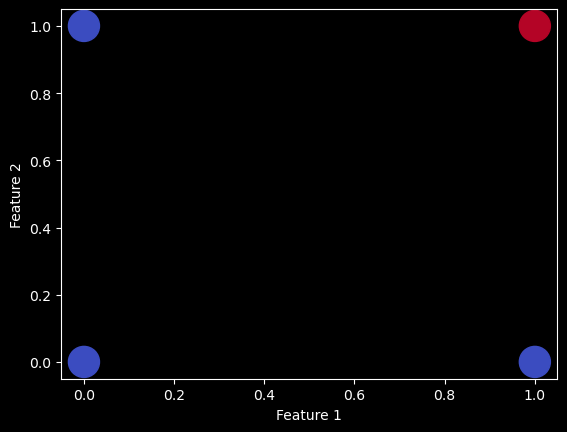

In [2]:
## AND dataset for training
X = np.array([[0.0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0.0, 1.0])

## Plot the AND dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=500)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Text(0, 0.5, 'Feature 2')

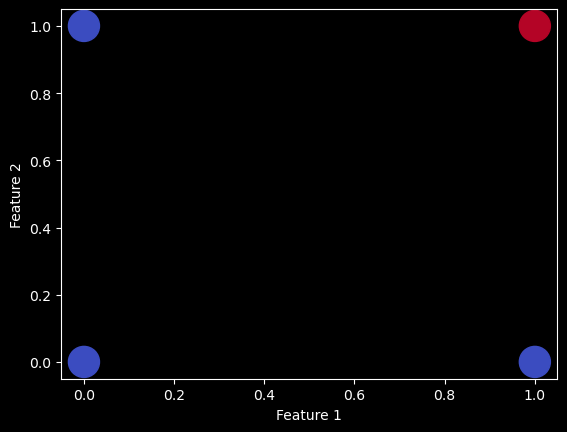

In [3]:
## train logistic regression model
from sklearn.linear_model import LogisticRegression, LinearRegression

model = LogisticRegression(penalty='none')
model.fit(X, y)
yhat = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=yhat, cmap=plt.cm.coolwarm, s=500)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Text(0.5, 1.0, 'Decision boundary for Logistic classifier on AND dataset')

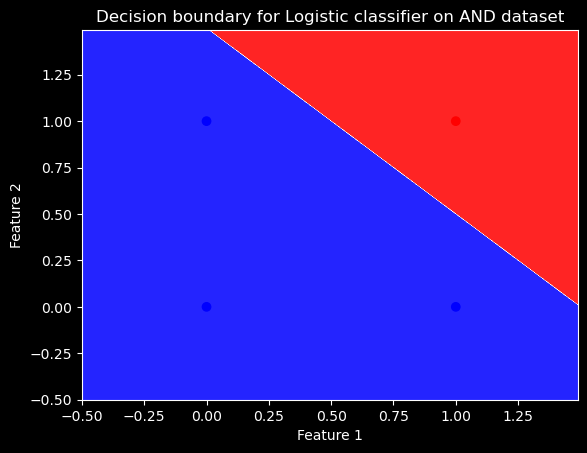

In [4]:
## plot decision boundary
def plot_decision_boundary(X, y, clf):
    """
    Plot the decision boundary of a trained classifier clf
    """
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole gid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')

plot_decision_boundary(X, y, model)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision boundary for Logistic classifier on AND dataset")


Text(0, 0.5, 'Feature 2')

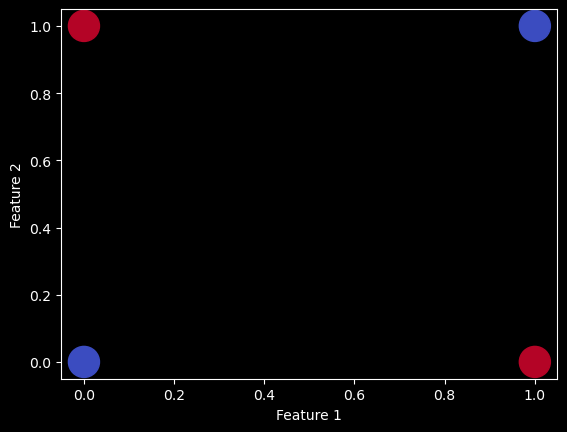

In [5]:
## XOR dataset for training

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1.0, 1.0, 0.0])

## Plot the XOR dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=500)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")


Text(0.5, 1.0, 'Decision boundary for Logistic classifier on AND dataset')

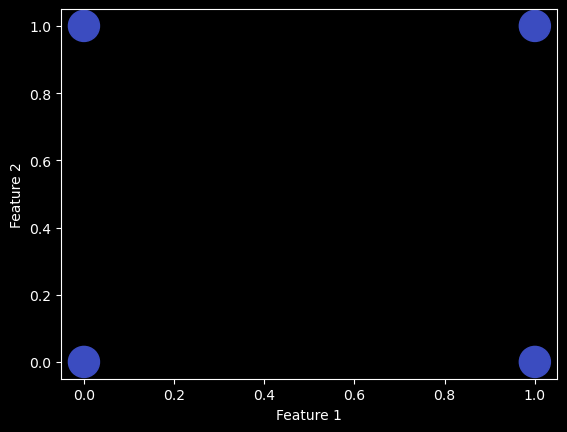

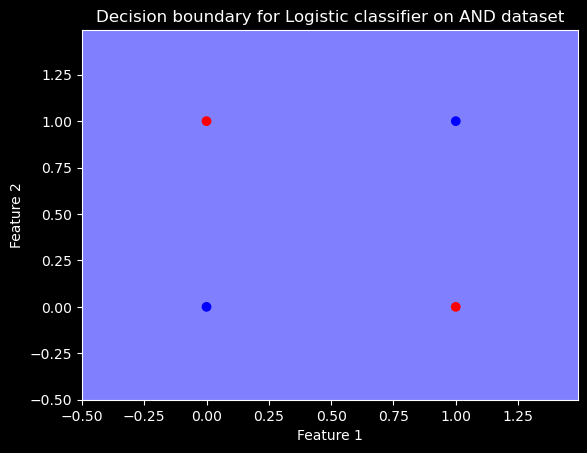

In [6]:
## train logistic regression model
from sklearn.linear_model import LogisticRegression, LinearRegression

model = LogisticRegression(penalty='none')
model.fit(X, y)
yhat = model.predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat, cmap=plt.cm.coolwarm, s=500)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.figure()
plot_decision_boundary(X, y, model)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision boundary for Logistic classifier on AND dataset")

## What is a neural network?

+ A neural network is a function that takes a vector of inputs and returns a vector of outputs
+ Anything for which you can use a matrix, you can use a neural network
+ Like linear regression, the entries in the matrix are trainable parameters


### Linear regression

$$
\hat{y} = \boldsymbol{\theta} X
$$

### Generalized linear regression

$$
\hat{y} = \sigma(\boldsymbol{\theta} X)
$$
where $\sigma(\cdot)$ is a nonlinear function. For logistic function, $\sigma(u) = {1}/({1 + e^{-u}})$

### Multilayer perceptron (a neural network)

$$
\hat{y} = \sigma(\boldsymbol{\theta}_2 \sigma(\boldsymbol{\theta}_1 X))
$$

where $\sigma$ is a nonlinear function, and $\boldsymbol{\theta}$ is a matrix of trainable parameters.

Text(0, 0.5, 'Feature 2')

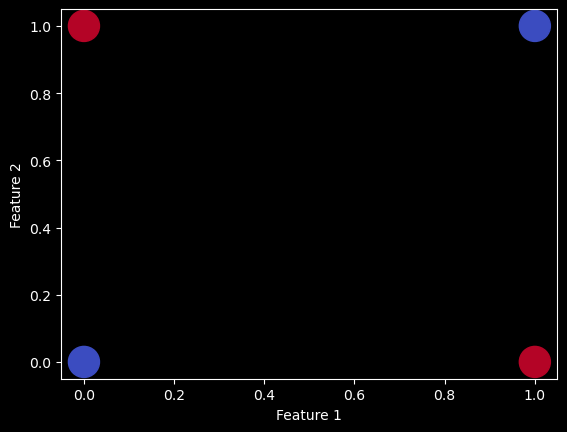

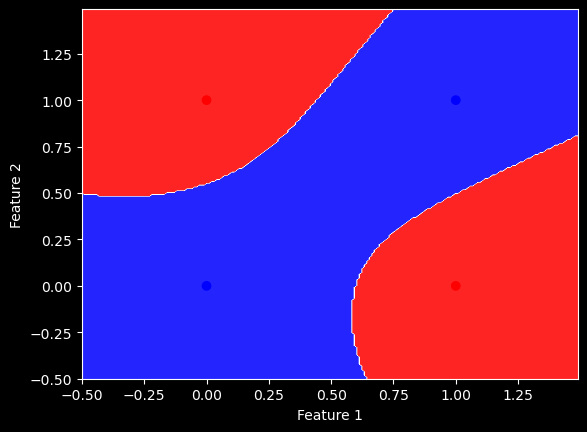

In [7]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(5), activation='tanh', max_iter=1000, random_state=0)

model.fit(X, y)
yhat = model.predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=yhat, cmap=plt.cm.coolwarm, s=500)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.figure()
plot_decision_boundary(X, yhat, model)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# What do neural networks do?

+ Neural networks can learn "arbitrary" nonlinear functions of the data
+ Cybenko's theorem: any continuous function can be approximated by a neural network with a single, sufficiently wide hidden layer
+ + Modern generalizations exist for deep networks, etc

### Multilayer perceptron

+ Simplest neural network: multilayer perceptron: matrix multiplication followed by a nonlinear function
+ Hyper parameters: number of layers, number of "neurons" per layer, activation function, regularization, etc

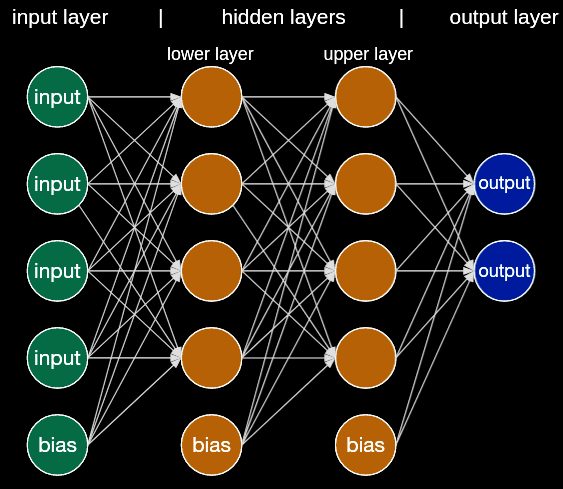

In [60]:
Image('../resources/mlp.png')
# https://medium.com/codex/introduction-to-how-an-multilayer-perceptron-works-but-without-complicated-math-a423979897ac

The diagram above is equivalent to writing

$$
\hat{\mathbf{y}} = \sigma(\boldsymbol{\theta}_3\sigma(\boldsymbol{\theta}_2 \sigma(\boldsymbol{\theta}_1 X)))
$$

where $\boldsymbol{\theta}_1 \in \mathbb{R}^{5 \times 5}$, $\boldsymbol{\theta}_2 \in \mathbb{R}^{5 \times 5}$, $\boldsymbol{\theta}_3 \in \mathbb{R}^{5 \times 2}$

In [8]:
## The code version

def mlp_forward(X):
    theta1 = np.random.random((5, 5))
    theta2 = np.random.random((5, 5))
    theta3 = np.random.random((5, 2))

    h1 = np.tanh(X @ theta1)
    h2 = np.tanh(h1 @ theta2)
    h3 = np.tanh(h2 @ theta3)

    return h3


X = np.random.random((10000, 5))

print("Input shape: ", X.shape)
print("Output shape: ", mlp_forward(X).shape)

Input shape:  (10000, 5)
Output shape:  (10000, 2)


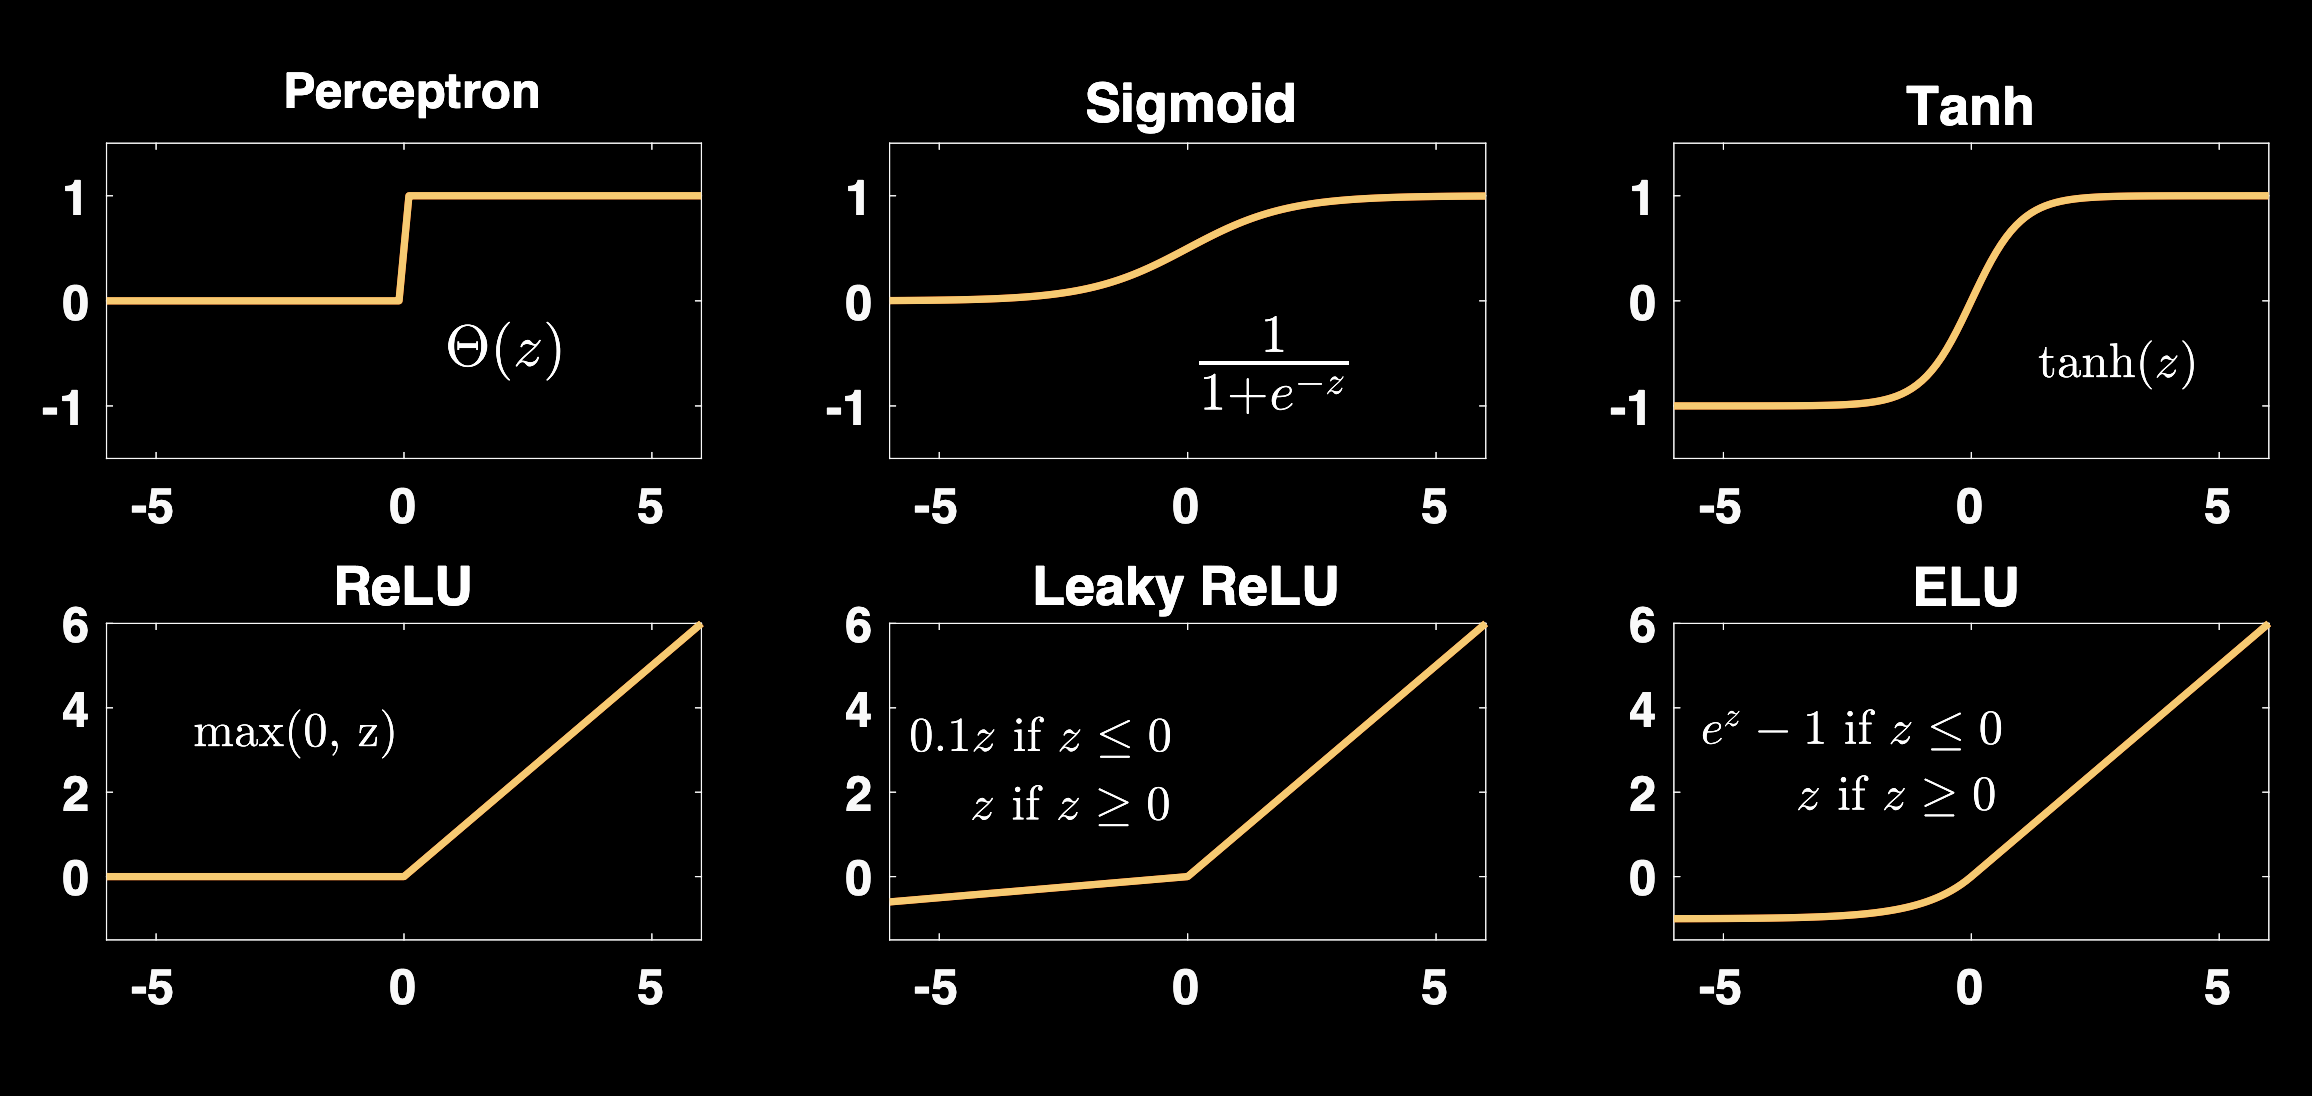

In [16]:
Image("../resources/activations.png", width=1000)
# Mehta et al textbook: https://arxiv.org/pdf/1803.08823.pdf

### A harder dataset: the space of turbulent flows

+ We will use a dataset of videos of 2D turbulent flows simulated at different Reynolds numbers
+ Each frame we will treat as a single datapoint in our dataset, with a number of features equal to the number of pixels in the frame
+ We will focus on the far-field wake of a cylinder, rather than the near-field, since this is a harder problem
+ Our supervised learning problem: Given a 2D turbulent flow field, predict the Reynolds number


Vorticity field data has shape: (2000, 127, 127)
Reynolds number data has shape: (2000,)


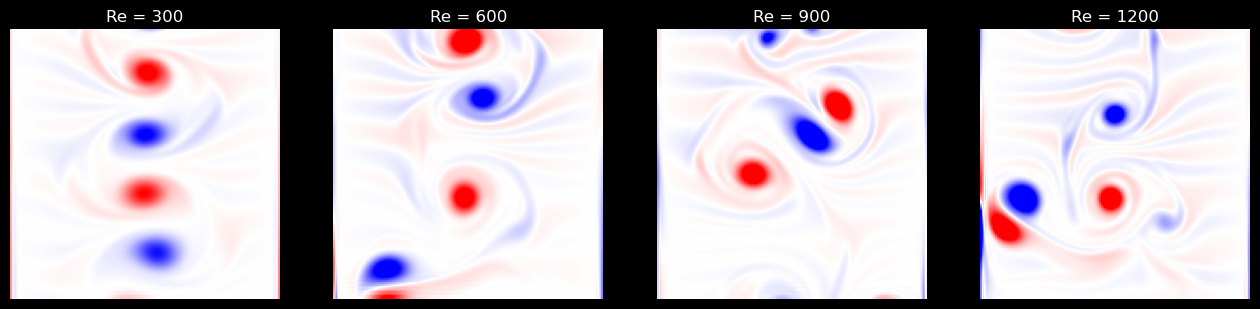

In [9]:
## load the turbulence dataset

all_vorticity_fields = list()
all_reynolds_numbers = list()

# Load simulations for different Reynolds numbers
re_vals = [300, 600, 900, 1200]
for re_val in re_vals:

    # Load the two-dimensional velocity field data. Data is stored in a 4D numpy array,
    # where the first dimension is the time index, the second and third dimensions are the
    # x and y coordinates, and the fourth dimension is the velocity components (ux or uv).
    vfield = np.load(
        f"../resources/von_karman_street/vortex_street_velocities_Re_{re_val}_largefile.npz", 
        allow_pickle=True
    )

    # Calculate the vorticity, which is the curl of the velocity field
    vort_field = np.diff(vfield, axis=1)[..., :-1, 1] + np.diff(vfield, axis=2)[:, :-1, :, 0]

    # Downsample the dataset
    vort_field = vort_field[::6, -127:, :]

    all_vorticity_fields.append(vort_field)
    all_reynolds_numbers.extend(re_val * np.ones(vort_field.shape[0]))

all_vorticity_fields = np.vstack(all_vorticity_fields)
all_reynolds_numbers = np.array(all_reynolds_numbers)

print("Vorticity field data has shape: {}".format(all_vorticity_fields.shape))
print("Reynolds number data has shape: {}".format(all_reynolds_numbers.shape))


## Plot some example snapshots of the vorticity field
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for i, (ax, re_val) in enumerate(zip(axes, re_vals)):
    ax.imshow(all_vorticity_fields[all_reynolds_numbers == re_val][0], cmap='bwr', vmin=-0.01, vmax=0.01)
    ax.set_title(f"Re = {re_val}")
    ax.axis('off')

    

In [11]:
## Convert into a machine-learning dataset by flattening features

# Flatten the vorticity field data
X = np.reshape(all_vorticity_fields, (all_vorticity_fields.shape[0], -1))
y = all_reynolds_numbers

print("Training data has shape: {}".format(X.shape))
print("Training labels have shape: {}".format(y.shape))

Training data has shape: (2000, 16129)
Training labels have shape: (2000,)


# How hard is this problem? Try playing with embeddings

+ Why are these lines?

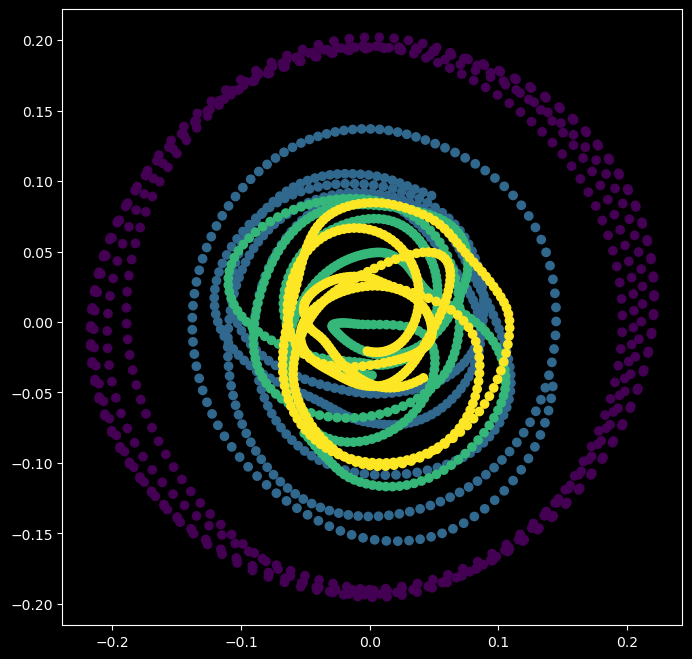

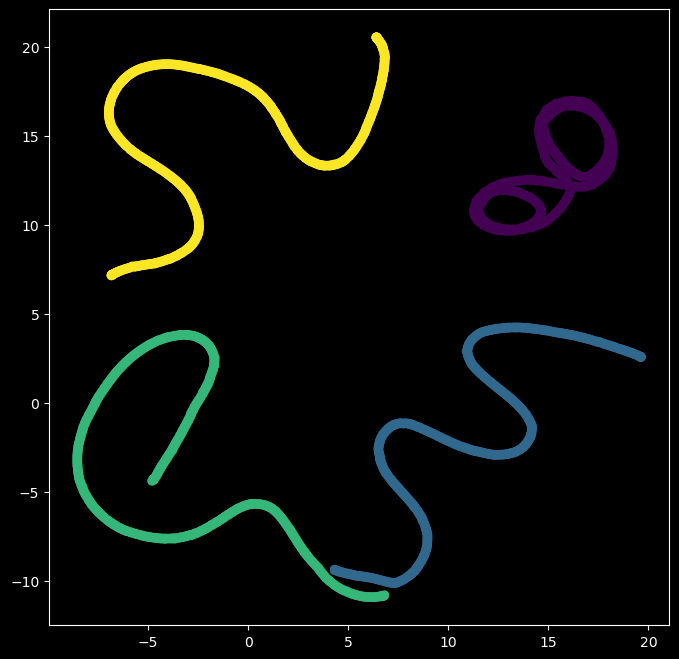

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=all_reynolds_numbers)



import umap

# Reduce the dimensionality of the data using UMAP
reducer = umap.UMAP(random_state=0)
X_umap = reducer.fit_transform(X)

# Plot the UMAP embedding
plt.figure(figsize=(8, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=all_reynolds_numbers)

### Do we have domain knowledge? ---> Feature engineering

Text(0, 0.5, 'UMAP 2')

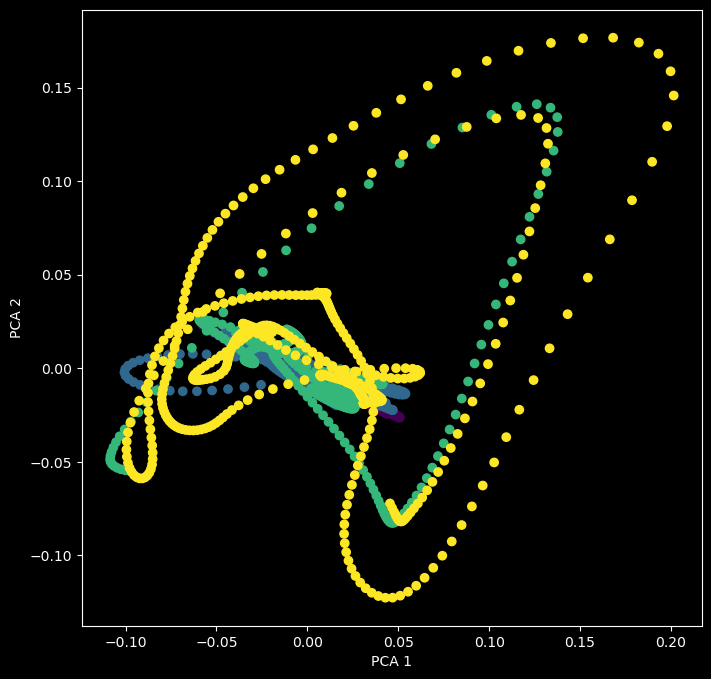

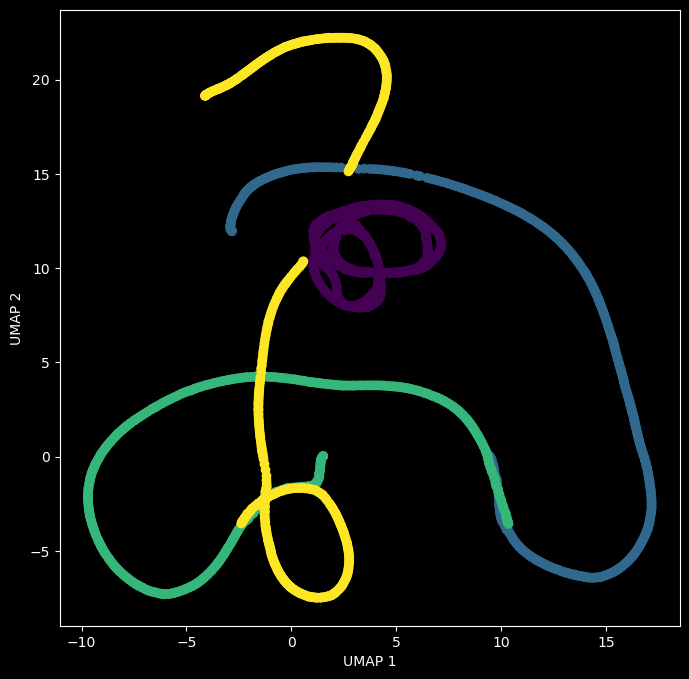

In [90]:
# Try finite differences
fd1 = np.gradient(all_vorticity_fields, axis=1).reshape((all_vorticity_fields.shape[0], -1))
fd2 = np.gradient(all_vorticity_fields, axis=2).reshape((all_vorticity_fields.shape[0], -1))
X_fd = np.hstack((fd1, fd2))
X_fd = np.reshape(X_fd, (X_fd.shape[0], -1))

# Try PCA and UMAP on the Fourier coefficients

# Reduce the dimensionality of the data using UMAP
reducer = PCA(n_components=2)
X_pca = reducer.fit_transform(X_fd)
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=all_reynolds_numbers)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")


reducer = umap.UMAP(random_state=0)
X_umap = reducer.fit_transform(X_fd)
plt.figure(figsize=(8, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=all_reynolds_numbers)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")


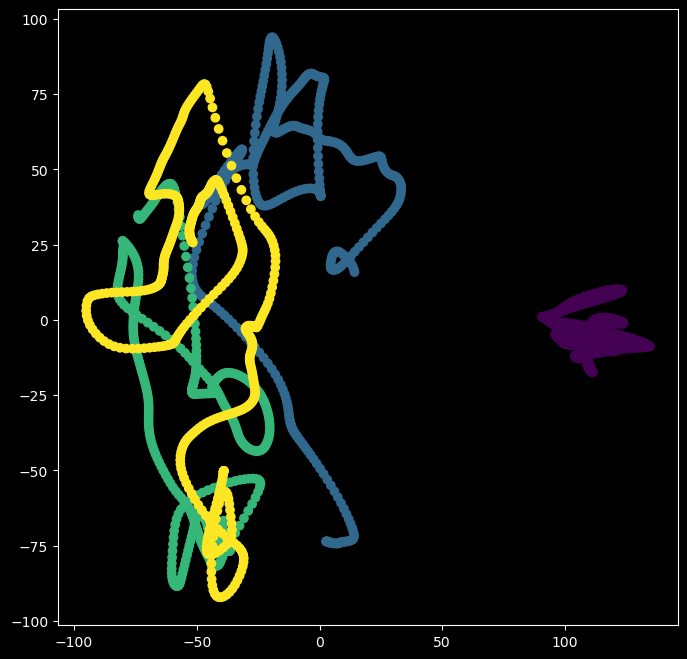

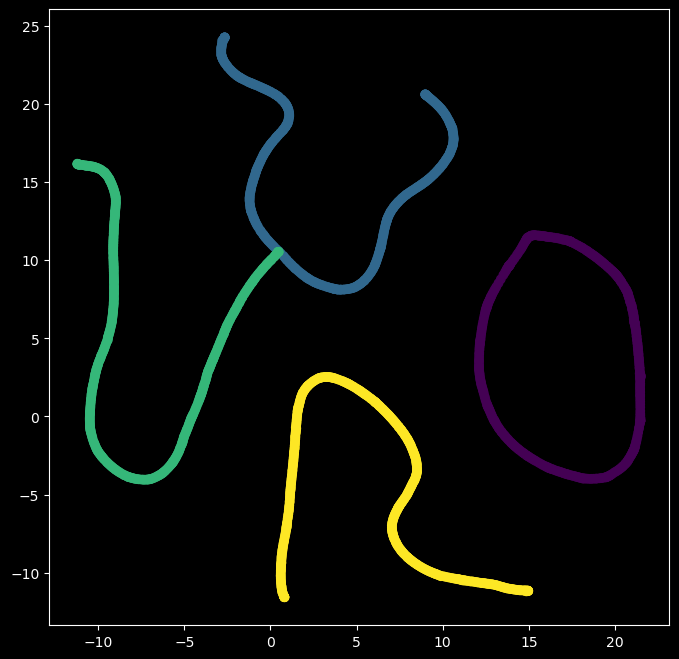

In [91]:
## Try featurizing with 2D Fourier coefficients

# Calculate the 2D Fourier coefficients
X_fft = np.fft.fft2(all_vorticity_fields)

# Convert to power spectrum
X_fft = np.reshape(np.abs(X_fft)**2, (X_fft.shape[0], -1))

# Try PCA and UMAP on the Fourier coefficients

# Reduce the dimensionality of the data using UMAP
reducer = PCA(n_components=2)
X_pca = reducer.fit_transform(X_fft)
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=all_reynolds_numbers)


reducer = umap.UMAP(random_state=0)
X_umap = reducer.fit_transform(X_fft)
plt.figure(figsize=(8, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=all_reynolds_numbers)



## Let's try training a model to predict Reynolds number

+ As a baseline, we'll use multinomial logistic regression, which extends logistic regression to more than two classes

Training set score: 0.88
Test set score: 0.86


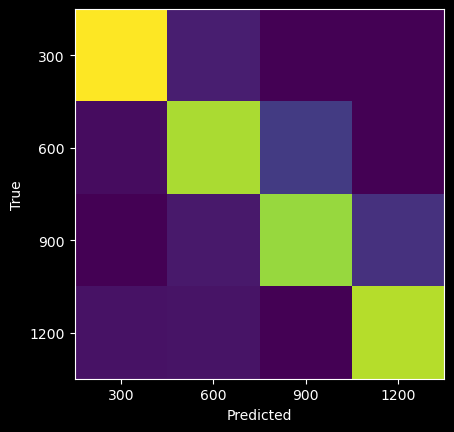

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict(X_test)

print("Training set score: {:.2f}".format(model_logistic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model_logistic.score(X_test, y_test)))

plt.imshow(confusion_matrix(y_test, y_pred_logistic))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(np.arange(len(re_vals)), re_vals);
plt.yticks(np.arange(len(re_vals)), re_vals);


Training set score: 0.89
Test set score: 0.88


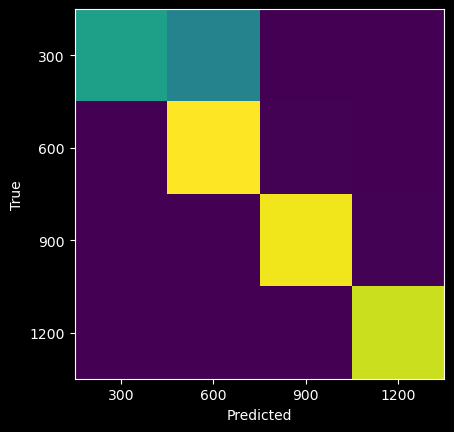

In [103]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# A 4 layer neural network with 10 hidden units in each layer
mlp = MLPClassifier(hidden_layer_sizes=(3, 3), random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("Training set score: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))

plt.imshow(confusion_matrix(y_test, y_pred))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(np.arange(len(re_vals)), re_vals);
plt.yticks(np.arange(len(re_vals)), re_vals);

## Can we do better? How deep should we go?

+ Model choices = hyperparameter tuning
+ We use cross-validation (we split train into validation sets)

Best cross-validation score: 1.00
Best parameters:  {'hidden_layer_sizes': 10}
Test set score: 1.00


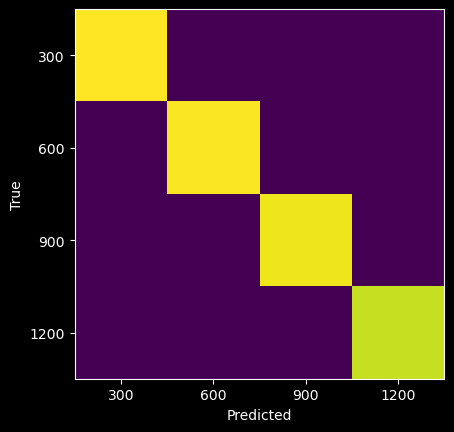

In [105]:
## Tuning hyperparameters with sklearn built-in grid search and cross-validation

from sklearn.model_selection import GridSearchCV

param_grid = {'hidden_layer_sizes': [(3, 3), (10), (5, 5, 5)]}
grid = GridSearchCV(MLPClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))

plt.imshow(confusion_matrix(y_test, grid.predict(X_test)))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(np.arange(len(re_vals)), re_vals);
plt.yticks(np.arange(len(re_vals)), re_vals);

# Create best model
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=0, alpha=0.0001)

Training set score: 1.00
Test set score: 1.00


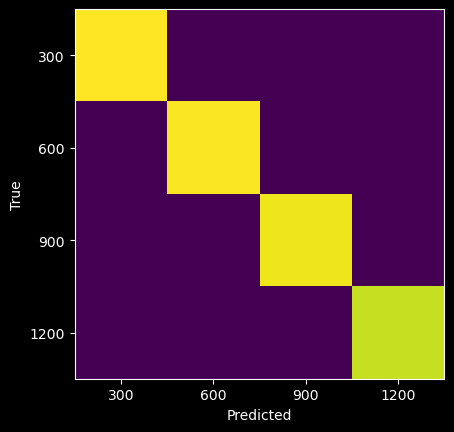

In [106]:
# A 4 layer neural network with 10 hidden units in each layer
mlp = MLPClassifier(hidden_layer_sizes=(10), random_state=0)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("Training set score: {:.2f}".format(mlp.score(X_train, y_train)))
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))

plt.imshow(confusion_matrix(y_test, y_pred))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(np.arange(len(re_vals)), re_vals);
plt.yticks(np.arange(len(re_vals)), re_vals);

### Visualize the decision boundary

+ We will visualize our decision boundary in a lower-dimensional space

Text(0.5, 1.0, 'Multi-Layer Perceptron')

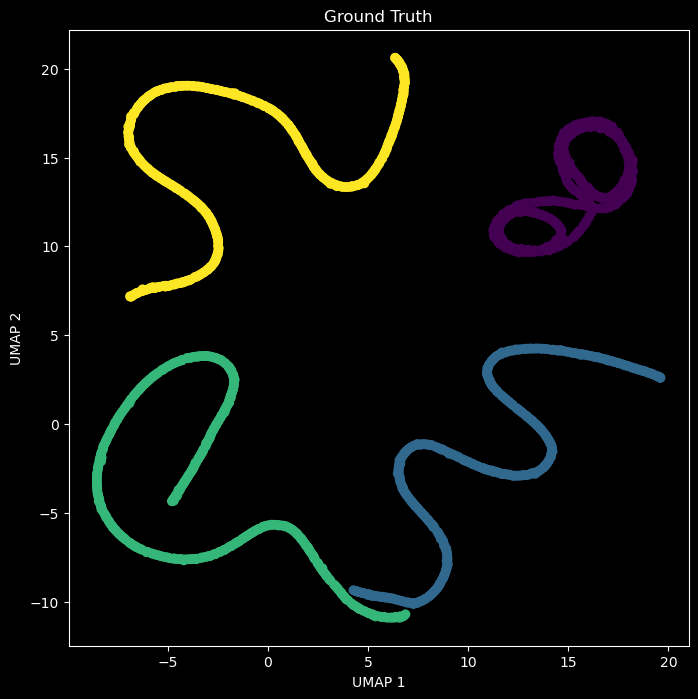

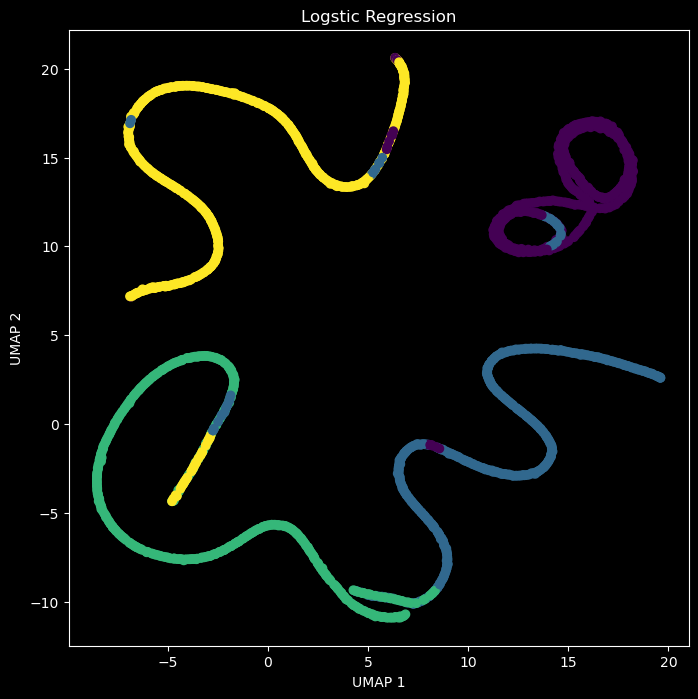

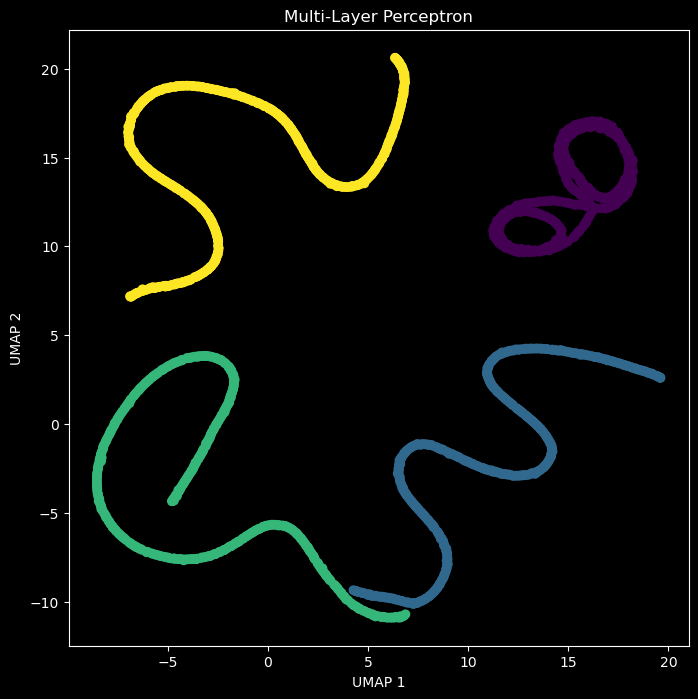

In [109]:
reducer = umap.UMAP(random_state=0)
# Train embedding on just the training data
reducer = umap.UMAP(random_state=0)
reducer.fit(X)
X_umap_train = reducer.transform(X_train)
X_umap_test = reducer.transform(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=y_train)
plt.scatter(X_umap_test[:, 0], X_umap_test[:, 1], c=y_test, marker='o')
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Ground Truth")

plt.figure(figsize=(8, 8))
plt.scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=y_train)
plt.scatter(X_umap_test[:, 0], X_umap_test[:, 1], c=y_pred_logistic, marker='o')
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Logstic Regression")

plt.figure(figsize=(8, 8))
plt.scatter(X_umap_train[:, 0], X_umap_train[:, 1], c=y_train)
plt.scatter(X_umap_test[:, 0], X_umap_test[:, 1], c=y_pred, marker='o')
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("Multi-Layer Perceptron")